### 1. Importing the needed libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from plotly import graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./dataset/WorldHappiness_Corruption_2015_2020.csv


### 2. About the dataset
The goal of the dataset is to find a relationship between some factors like freedom, happiness score, generosity etc. and the CPI score
1. Dataset columns:

gdp_per_capita: The Gross Domestic Product per capita, or GDP per capita, is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population.
dystopia_residual: The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
cpi_score: The Corruption Perceptions Index (CPI) is an index which ranks countries "by their perceived levels of public sector corruption.

### 3. Loading the dataset

In [2]:
data = pd.read_csv("./dataset/WorldHappiness_Corruption_2015_2020.csv")
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


### 4. Exploring the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [4]:
#shape of the dataset
data.shape

(792, 13)

In [5]:
# Columns names
data.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

In [6]:
#some statistical information about the dataset
data.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


<AxesSubplot:>

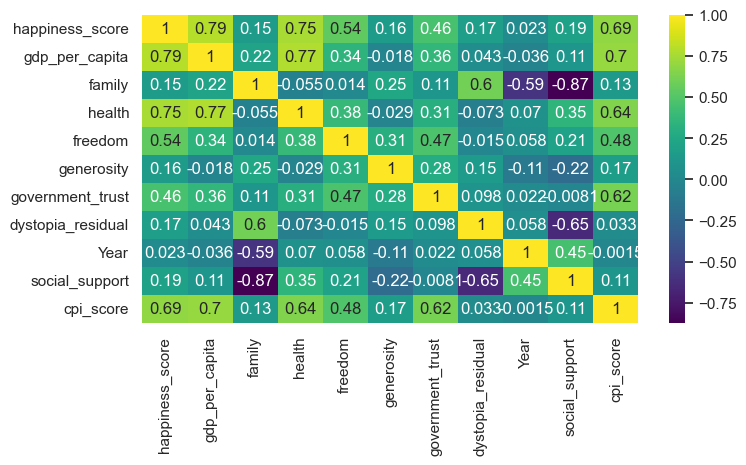

In [7]:
#visualizing the correlation
sns.set(rc = {'figure.figsize':(8,4)})
sns.heatmap(data.corr(), annot= True,  cmap='viridis')

### 5. EDA

#### 5.1 Countries with the highest CPI score


<AxesSubplot:xlabel='cpi_score', ylabel='Country'>

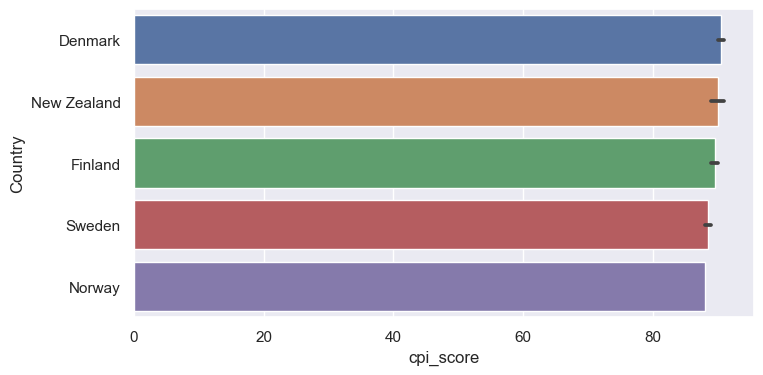

In [8]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.barplot(
    y = 'Country',
    x = 'cpi_score',
    data = data.nlargest(10, 'cpi_score')
)

In [9]:
check_country = data.nlargest(10, 'cpi_score')
check_country['Country'].unique()

array(['Denmark', 'New Zealand', 'Finland', 'Sweden', 'Norway'],
      dtype=object)

As noticed the Denemark has the highest CPI score among the countries

#### 5.2 Which country has the highest happiness score?


<AxesSubplot:xlabel='Country', ylabel='happiness_score'>

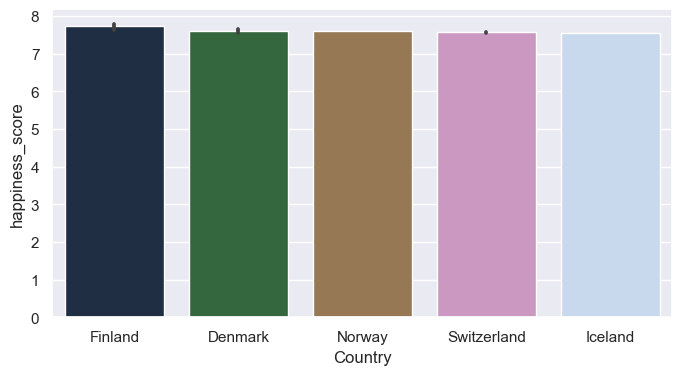

In [10]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.barplot(
    x = 'Country',
    y = 'happiness_score',
    data = data.nlargest(10, 'happiness_score'), palette='cubehelix'
)

Among all the countries, Finland has the highest happiness score

#### 5.3 Are the happiness score and the CPI score correlated?


<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

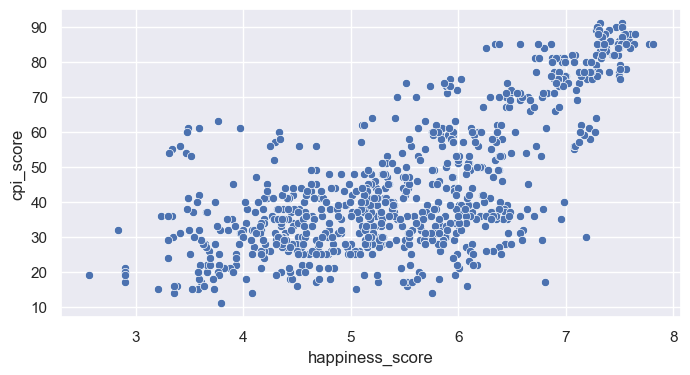

In [11]:
sns.scatterplot(x = "happiness_score", y = "cpi_score", data = data)

We can notice that as the happiness score increases, the CPI score also increases.

#### 5.4 Which country has the highest family care rate?


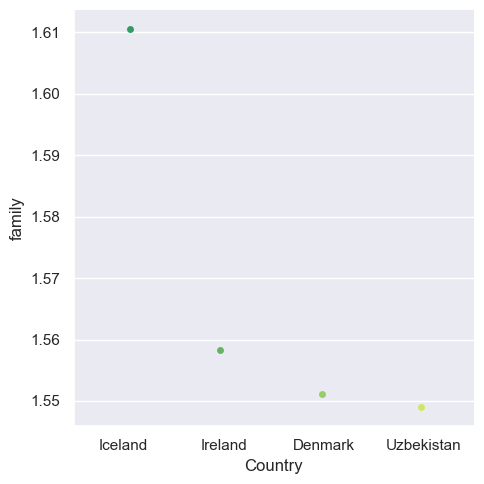

In [12]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.catplot(x = "Country", y = "family", palette = "summer", data = data.nlargest(4, 'family'))

Iceland has the highest family care rate.

#### 5.5 Does the family care rate contributes in the CPI score?


<AxesSubplot:xlabel='family', ylabel='cpi_score'>

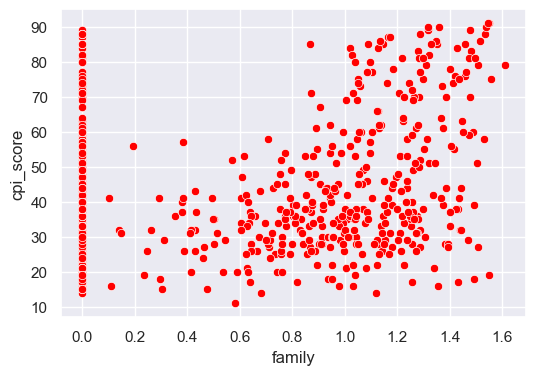

In [13]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.scatterplot(x="family", y = "cpi_score", data = data, color = "red")

Family care rate above zero:

They are dirctly propotional to each other.

#### 5.6 Which country has the highest gdp_per_capita?


<AxesSubplot:xlabel='Country', ylabel='gdp_per_capita'>

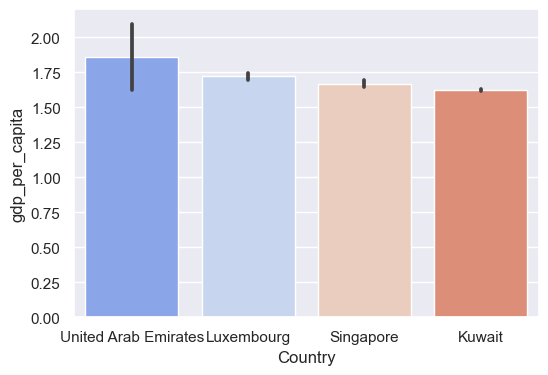

In [14]:
sns.barplot(y= "gdp_per_capita", x = "Country", data = data.nlargest(8, 'gdp_per_capita'), palette = "coolwarm")

United Arab Emirates has the highest GDP.

#### 5.7 Is there any relationship between the GDP score and the CPI score?


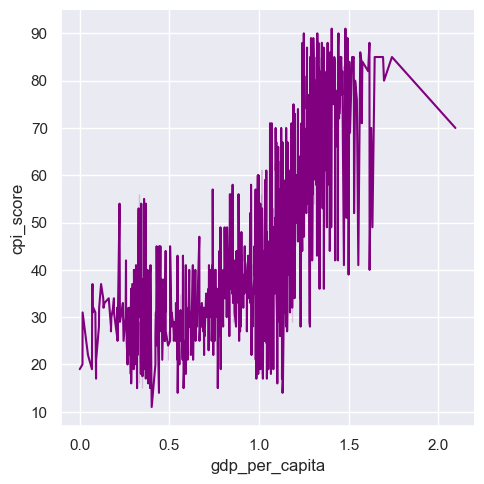

In [15]:
sns.set(rc = {'figure.figsize':(30,10)})
sns.relplot(data=data, x="gdp_per_capita", y="cpi_score", kind="line", color = "Purple")

The CPI score increases by increasing the GDP score.

#### 5.8 Which country has the highest health rates?


In [16]:
fig = px.pie(data.nlargest(5, 'health'), values='health', names='Country', title='Countries With The Highest Health Rates', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


Singapore has the highest health care.

#### 5.9 To what degree does the health rate affect the CPI score?


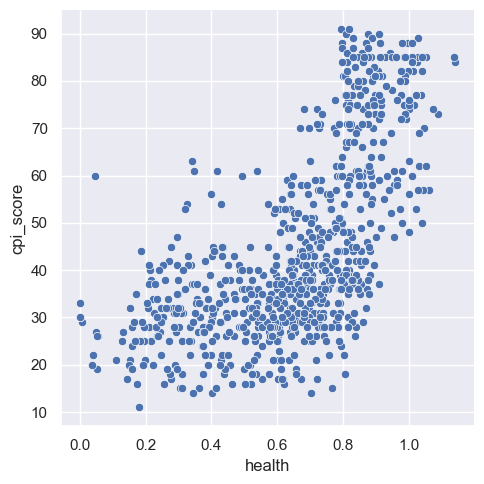

In [17]:
sns.relplot(
    data=data,
    x="health", y="cpi_score",
    palette="ch:r=-.5,l=.75"
)

We have the highest CPI score at the highest health rate.

#### 5.10 Which country supports its people freedom?


In [18]:
fig = px.bar(data.nlargest(5, 'freedom'), x='Country', y='freedom', height=400)
fig.show()

Uzbekistan has high freedom support rates.

#### 5.11 The relation between the freedom and the CPI score?


In [19]:
fig = px.scatter(data, x="freedom", y="cpi_score", color="continent",
                 hover_name="Country", log_x=True, size_max=60)
fig.show()

The higher the freedom rates are, the higher the CPI scores are.

#### 5.12 Which counrty is the most generous one?


<AxesSubplot:xlabel='Country', ylabel='gdp_per_capita'>

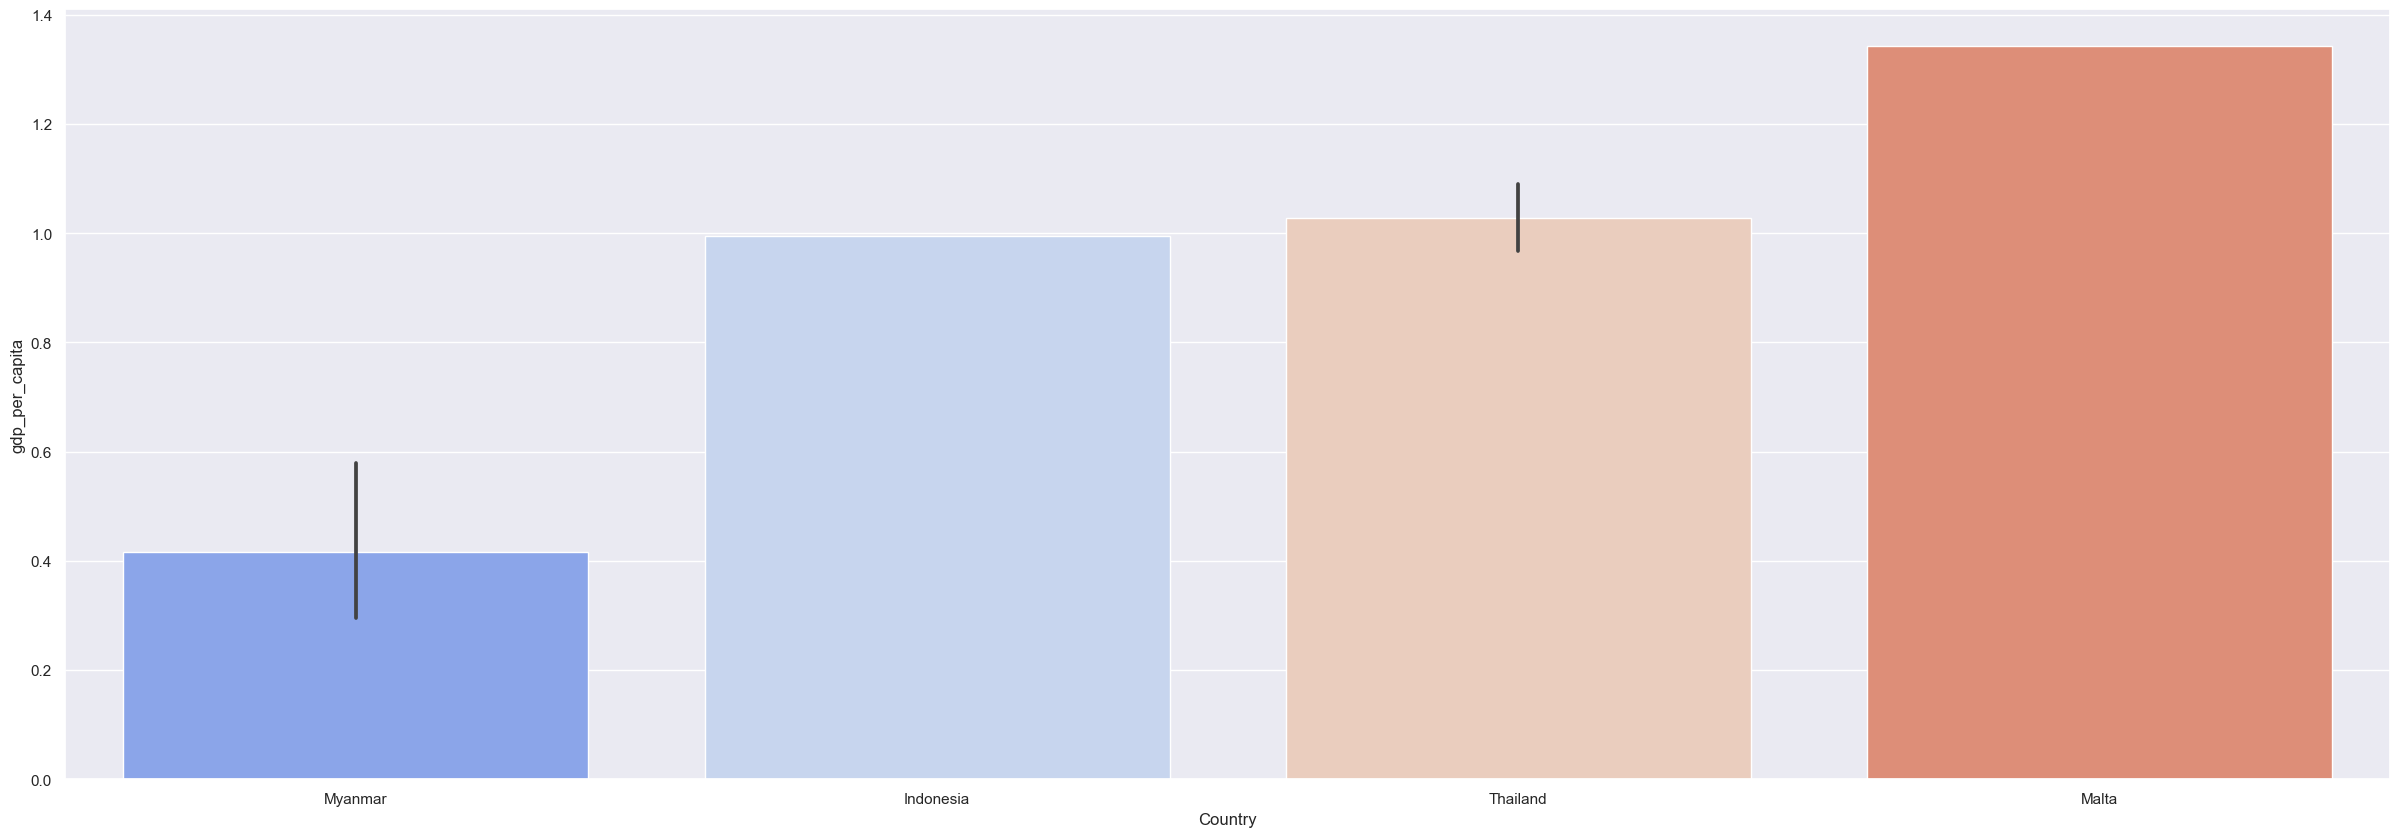

In [20]:
sns.barplot(y= "gdp_per_capita", x = "Country", data = data.nlargest(8, 'generosity'), palette = "coolwarm")

#### 5.13 What is the relation between generousity and CPI score?


In [21]:
fig = px.scatter(data, x="generosity", y="cpi_score", color="continent",
                 hover_name="Country", log_x=True, size_max=60)
fig.show()

### 6. Dataset Preprocessing


#### 6.1 Handling missing values


In [22]:
#the missing values
data.isnull().head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#the number of the missing values
data.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

Our dataset has no missing values.

#### 6.2 Handling the outliers


##### 6.2.1 Happiness score feature


In [24]:
#Some statistical information about the column
data["happiness_score"].describe()

count    792.000000
mean       5.473310
std        1.124726
min        2.566900
25%        4.590750
50%        5.485500
75%        6.300500
max        7.808700
Name: happiness_score, dtype: float64

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

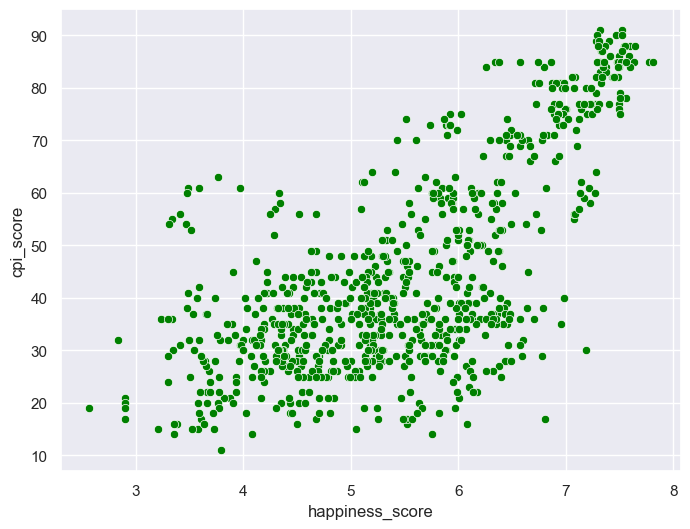

In [25]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "happiness_score", y = "cpi_score", data = data, color = "green")

There is no outliers in this column.

##### 6.2.2 gdp_per_capita feature


In [26]:
#Some statistical information about the column
data["gdp_per_capita"].describe()

count    792.000000
mean       0.929217
std        0.385774
min        0.000000
25%        0.644242
50%        0.994544
75%        1.228677
max        2.096000
Name: gdp_per_capita, dtype: float64

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

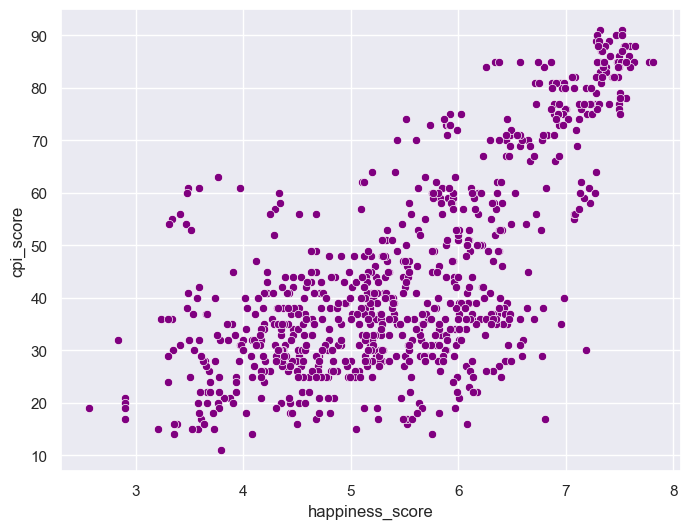

In [27]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "happiness_score", y = "cpi_score", data = data, color = "purple")

There is no outliers in this column.

##### 6.2.3 family feature


In [28]:
#Some statistical information about the column
data["family"].describe()

count    792.000000
mean       0.504998
std        0.552736
min        0.000000
25%        0.000000
50%        0.000000
75%        1.040410
max        1.610574
Name: family, dtype: float64

<AxesSubplot:xlabel='family', ylabel='cpi_score'>

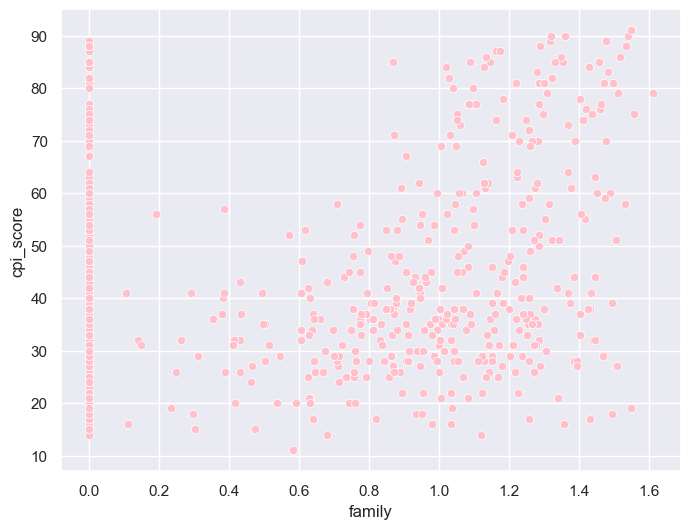

In [29]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "family", y = "cpi_score", data = data, color = "pink")

There is no outliers

##### 6.2.4 health feature


In [30]:
#Some statistical information about the column
data["health"].describe()

count    792.000000
mean       0.648691
std        0.232261
min        0.000000
25%        0.510070
50%        0.685397
75%        0.815641
max        1.141000
Name: health, dtype: float64

<AxesSubplot:xlabel='family', ylabel='cpi_score'>

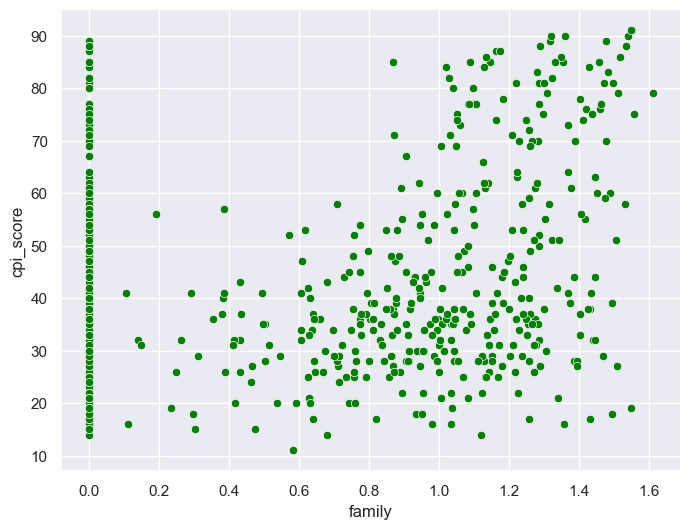

In [31]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "family", y = "cpi_score", data = data, color = "green")

There is no outliers.

##### 6.2.5 generosity feature


In [32]:
#Some statistical information about the column
data["generosity"].describe()

count    792.000000
mean       0.212440
std        0.121660
min        0.000000
25%        0.125784
50%        0.197000
75%        0.273250
max        0.838075
Name: generosity, dtype: float64

<AxesSubplot:xlabel='family', ylabel='cpi_score'>

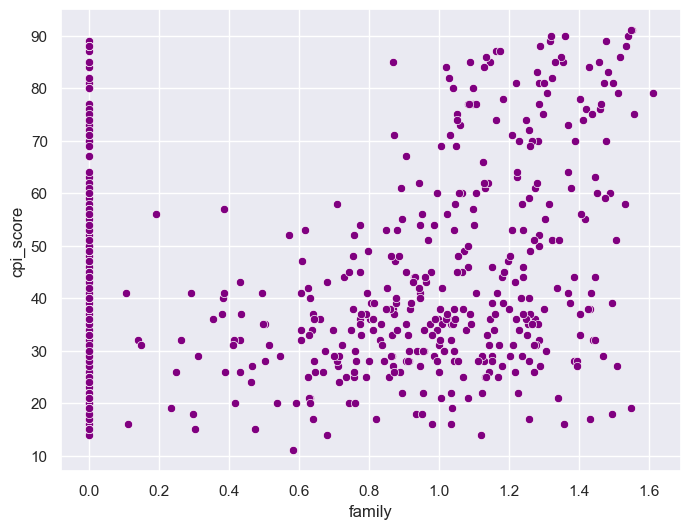

In [33]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "family", y = "cpi_score", data = data, color = "purple")

There is no outliers.

##### 6.2.6 government_trust feature


In [34]:
#Some statistical information about the column
data["government_trust"].describe()

count    792.000000
mean       0.125720
std        0.109032
min        0.000000
25%        0.052862
50%        0.089000
75%        0.154250
max        0.551910
Name: government_trust, dtype: float64

<AxesSubplot:xlabel='government_trust', ylabel='cpi_score'>

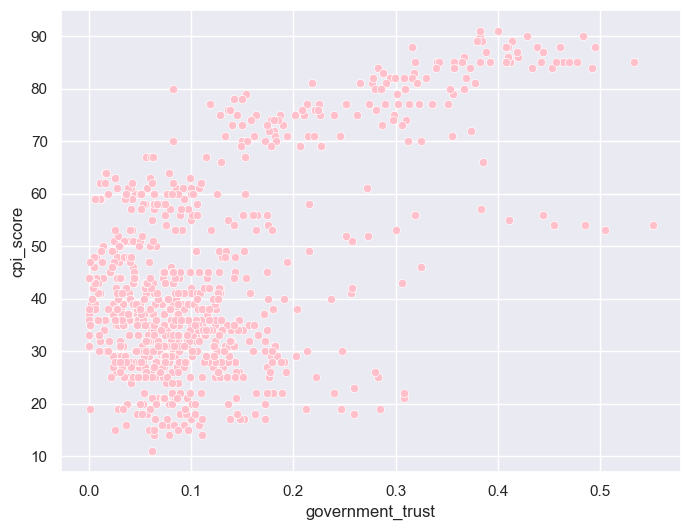

In [35]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "government_trust", y = "cpi_score", data = data, color = "pink")

There is no outliers.

##### 6.2.7 dystopia_residual feature


In [36]:
#Some statistical information about the column
data["dystopia_residual"].describe()

count    792.000000
mean       1.379277
std        1.075276
min        0.000000
25%        0.000000
50%        1.731948
75%        2.236894
max        3.602140
Name: dystopia_residual, dtype: float64

<AxesSubplot:xlabel='dystopia_residual', ylabel='cpi_score'>

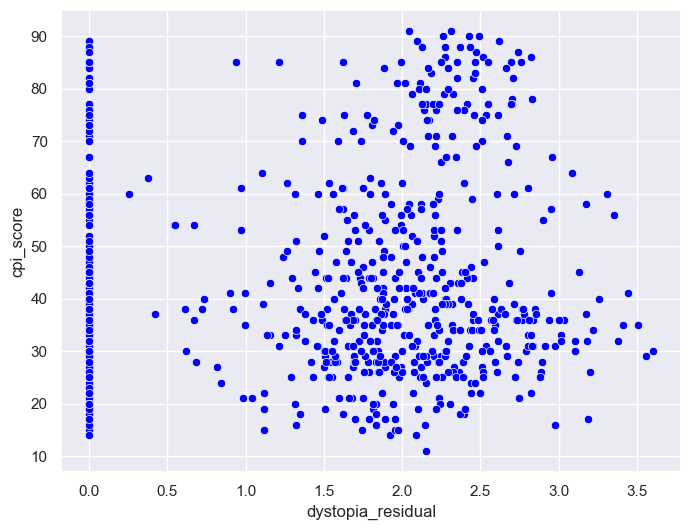

In [37]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "dystopia_residual", y = "cpi_score", data = data, color = "blue")

There is no outliers.

##### 6.2.8 year feature


In [38]:
#Some statistical information about the column
data["Year"].describe()

count     792.000000
mean     2017.500000
std         1.708904
min      2015.000000
25%      2016.000000
50%      2017.500000
75%      2019.000000
max      2020.000000
Name: Year, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='cpi_score'>

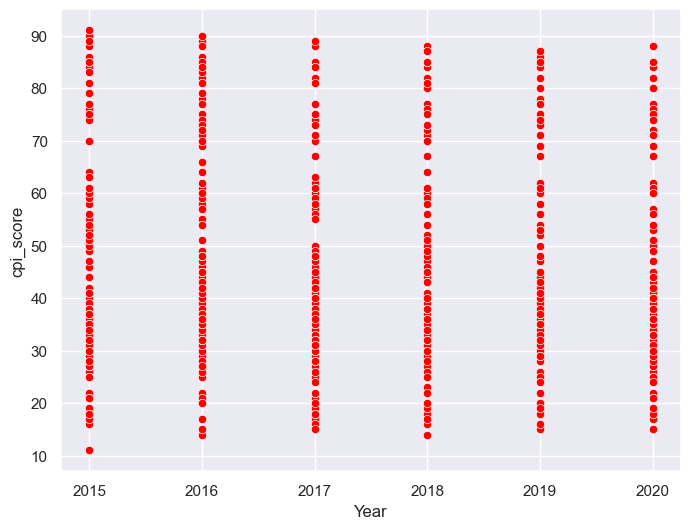

In [39]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "Year", y = "cpi_score", data = data, color = "red")

There is no outliers.

##### 6.2.9 social_support feature


In [40]:
#Some statistical information about the column
data["social_support"].describe()

count    792.000000
mean       0.609302
std        0.640754
min        0.000000
25%        0.000000
50%        0.176214
75%        1.268250
max        1.644000
Name: social_support, dtype: float64

<AxesSubplot:xlabel='social_support', ylabel='cpi_score'>

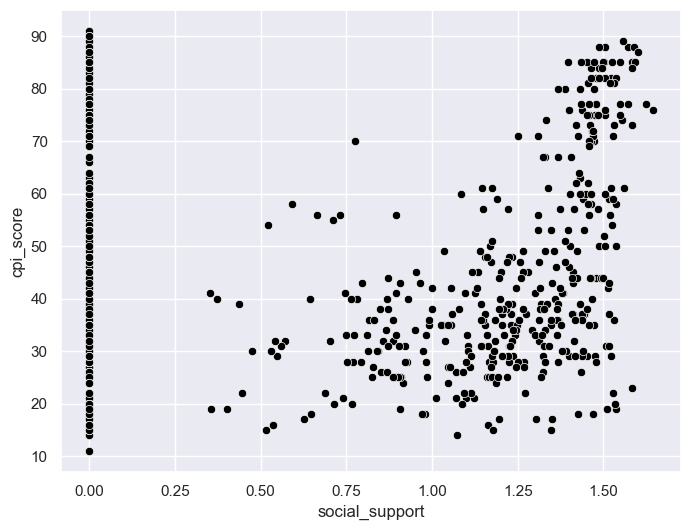

In [41]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "social_support", y = "cpi_score", data = data, color = "black")

There is no outliers.

#### 6.3 Encoding


##### 6.3.1 Country feature encoding


In [42]:
country_le = LabelEncoder()
data["Country"] = country_le.fit_transform(data["Country"])
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,90,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,30,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,49,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,112,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,37,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


##### 6.3.2 Continent encoding


In [43]:
continent_le = LabelEncoder()
data["continent"] = continent_le.fit_transform(data["continent"])
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,90,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,3,2015,0.0,88
1,30,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,3,2015,0.0,91
2,49,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,3,2015,0.0,79
3,112,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,3,2015,0.0,86
4,37,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,3,2015,0.0,90


#### 6.4 Features Selection


In [44]:
x = data.corr()
# x.style.background_gradient(cmap = "Set3")
x

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
Country,1.000000e+00,-0.002398,-0.018835,0.037935,-0.040388,0.086367,0.118777,0.046771,-0.032824,-1.267242e-01,3.105248e-15,0.030144,-0.008631
happiness_score,-2.397663e-03,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,5.428805e-01,2.349506e-02,0.192633,0.693001
gdp_per_capita,-1.883494e-02,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,3.892918e-01,-3.578169e-02,0.111701,0.704483
family,3.793530e-02,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,1.074931e-01,-5.886299e-01,-0.869885,0.132031
health,-4.038787e-02,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,4.993071e-01,7.017157e-02,0.347438,0.644478
freedom,8.636748e-02,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,1.979965e-01,5.819511e-02,0.208709,0.482923
generosity,1.187765e-01,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-4.614786e-02,-1.097969e-01,-0.215131,0.165972
government_trust,4.677116e-02,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,3.541837e-02,2.178084e-02,-0.008136,0.620089
dystopia_residual,-3.282408e-02,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,1.208928e-01,5.751859e-02,-0.654570,0.032630
continent,-1.267242e-01,0.542881,0.389292,0.107493,0.499307,0.197996,-0.046148,0.035418,0.120893,1.000000e+00,-5.321920e-14,0.106868,0.244454


From the previous table we can drop Country, continent and Year features because they aren't correlated with the target.

In [45]:
data = data.drop(["Country", "continent", "Year"], axis = 1)
data.head()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.0,88
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.0,91
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0,79
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.0,86
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0.0,90


#### 6.5 Feature Scaling

In [46]:
#Making a copy from the column that needs to be scaled
scale = data.iloc[:, :-1]
scale.reset_index()
scaler = RobustScaler()
scale = scaler.fit_transform(scale.to_numpy())
scale = pd.DataFrame (scale, columns = ["happiness_score", "gdp_per_capita", "family", "health", "freedom", "generosity", "government_trust", "dystopia_residual", "social_support"])
scale.head()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support
0,1.199883,1.064137,1.473961,0.364135,0.886594,1.118986,2.238578,0.243677,-0.138943
1,1.191110,0.834719,1.490875,0.350714,0.843959,1.073337,3.075035,0.260075,-0.138943
2,1.180582,0.831724,1.548019,0.484845,0.849193,1.888846,0.636435,0.264102,-0.138943
3,1.174733,0.976046,1.457994,0.565282,0.817080,0.634379,2.742027,0.243538,-0.138943
4,1.160111,0.768311,1.480423,0.405013,0.807482,0.328773,2.895934,0.312144,-0.138943


In [47]:
data.iloc[:, : -1] = scale
data.head()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,social_support,cpi_score
0,1.199883,1.064137,1.473961,0.364135,0.886594,1.118986,2.238578,0.243677,-0.138943,88
1,1.191110,0.834719,1.490875,0.350714,0.843959,1.073337,3.075035,0.260075,-0.138943,91
2,1.180582,0.831724,1.548019,0.484845,0.849193,1.888846,0.636435,0.264102,-0.138943,79
3,1.174733,0.976046,1.457994,0.565282,0.817080,0.634379,2.742027,0.243538,-0.138943,86
4,1.160111,0.768311,1.480423,0.405013,0.807482,0.328773,2.895934,0.312144,-0.138943,90


### 7. Train Test Split

In [48]:
x = data.drop(['cpi_score'], axis= 1).values 
y = data["cpi_score"].values

In [49]:
x.shape

(792, 9)

In [50]:
y.shape

(792,)

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.20, random_state = 42, shuffle=True)

In [52]:
x_train.shape

(633, 9)

In [53]:
x_test.shape

(159, 9)

### 8. Modeling


#### 8.1 First model with 2 hidden layers


In [54]:
model1 = Sequential()

In [55]:
#input layer
model1.add(Dense(20, input_shape = (9,), activation = 'relu'))

In [56]:
#hidden layers
model1.add(Dense(10, activation = "relu"))
model1.add(Dense(8, activation = "relu"))

In [57]:
model1.add(Dense(1))

In [58]:
model1.compile(optimizer = "Adam", loss = "mse", metrics = "mae")

In [59]:
#training
model1.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 200, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 111ms/step - loss: 2444.1536 - mae: 45.2609 - val_loss: 2168.4043 - val_mae: 42.4542
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 2435.2124 - mae: 45.1743 - val_loss: 2161.0071 - val_mae: 42.3793
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 2426.6477 - mae: 45.0918 - val_loss: 2153.9551 - val_mae: 42.3079
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 2418.6011 - mae: 45.0139 - val_loss: 2147.0569 - val_mae: 42.2382
Epoch 5/20
4/4 [==============================] - 0s 17ms/step - loss: 2410.8430 - mae: 44.9395 - val_loss: 2140.4424 - val_mae: 42.1711
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 2403.5740 - mae: 44.8691 - val_loss: 2134.2876 - val_mae: 42.1083
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 2396.9385 - mae: 44.8033 - val_loss: 2128.7261 - val_mae: 42.0505
Epoch 8/20
4/4 [========================

In [60]:
#testing
model1_pred = model1.predict(x_test)

5/5 [==============================] - 0s 2ms/step


##### 8.1.1 First Model Evalaution


In [61]:
#mean absolute error
mae1 = mean_absolute_error(y_test, model1_pred)
mae1

40.90339892409133

In [62]:
#mean squared error
mse1 = mean_squared_error(y_test, model1_pred)
mse1

2025.6254573278416

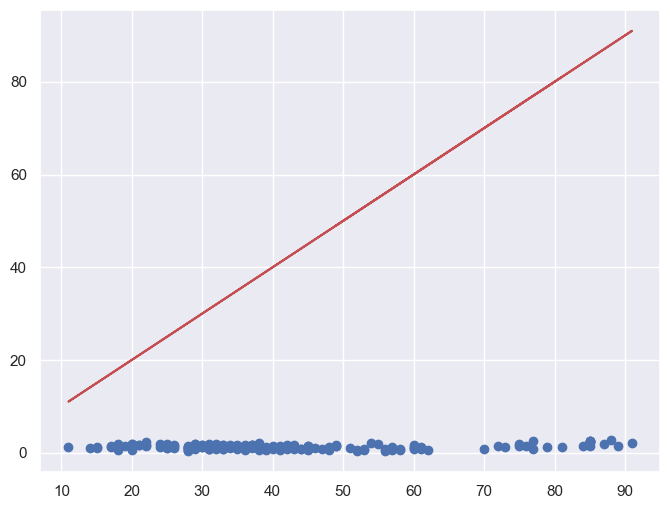

In [63]:
plt.scatter(y_test, model1_pred)
plt.plot(y_test, y_test, "r")

In [64]:
model1.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 2025.6254 - mae: 40.9034


[2025.6253662109375, 40.90340042114258]

#### 8.2 Second model with 4 hidden layers

In [65]:
model2 = Sequential()

In [73]:
#input layer
model2.add(Dense(7, input_shape = (9,), activation = 'relu'))

In [75]:
#hidden layers
model2.add(Dense(7, activation = "linear"))
model2.add(Dense(5, activation = "linear"))
model2.add(Dense(7, activation = "relu"))
model2.add(Dense(5, activation = "relu"))

In [77]:
#output layer
model2.add(Dense(1))

In [78]:
model2.compile(optimizer = "Adam", loss = "mse", metrics = "mae")

In [79]:
#training
model2.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 200, epochs = 40)

Epoch 1/40
4/4 [==============================] - 1s 126ms/step - loss: 2384.5630 - mae: 44.7193 - val_loss: 2115.2832 - val_mae: 41.9432
Epoch 2/40
4/4 [==============================] - 0s 20ms/step - loss: 2375.3093 - mae: 44.6190 - val_loss: 2105.6638 - val_mae: 41.8346
Epoch 3/40
4/4 [==============================] - 0s 21ms/step - loss: 2365.1392 - mae: 44.5116 - val_loss: 2096.0979 - val_mae: 41.7280
Epoch 4/40
4/4 [==============================] - 0s 23ms/step - loss: 2354.9778 - mae: 44.4033 - val_loss: 2086.0115 - val_mae: 41.6139
Epoch 5/40
4/4 [==============================] - 0s 18ms/step - loss: 2343.7871 - mae: 44.2848 - val_loss: 2074.6475 - val_mae: 41.4849
Epoch 6/40
4/4 [==============================] - 0s 17ms/step - loss: 2331.5449 - mae: 44.1507 - val_loss: 2061.5718 - val_mae: 41.3357
Epoch 7/40
4/4 [==============================] - 0s 17ms/step - loss: 2316.7249 - mae: 43.9933 - val_loss: 2046.3571 - val_mae: 41.1618
Epoch 8/40
4/4 [========================

In [80]:
#testing
model2_pred = model2.predict(x_test)

5/5 [==============================] - 0s 3ms/step


##### 8.2.1 Second Model Evaluation

In [81]:
#mean absolute error
mae2 = mean_absolute_error(y_test, model2_pred)
mae2

9.628067160552403

In [82]:
#mean squared error
mse2 = mean_squared_error(y_test, model2_pred)
mse2

143.05012100598233

The error in model2 is less than the error in model1

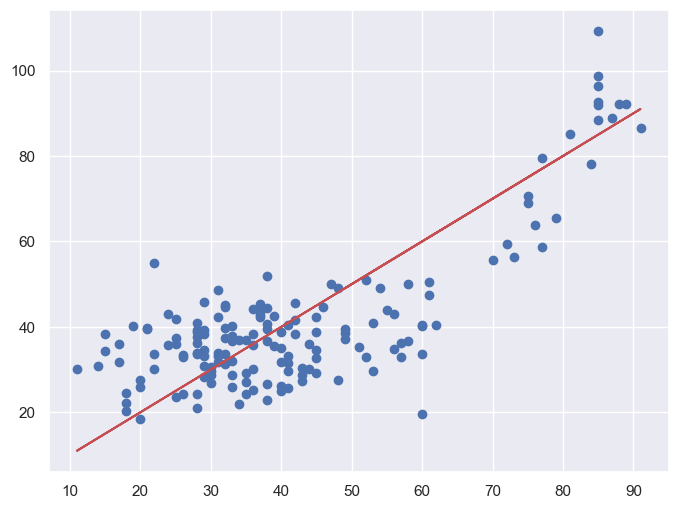

In [83]:
plt.scatter(y_test, model2_pred)
plt.plot(y_test, y_test, "r")

Much better than model1

#### 8.3 Third model with 7 hidden layers and 60 epochs


In [84]:
model3 = Sequential()

In [85]:
#input layer
model3.add(Dense(9, input_shape = (9,), activation = 'relu'))

In [86]:
#hidden layers
model3.add(Dense(8, activation = "linear"))
model3.add(Dense(7, activation = "linear"))
model3.add(Dense(6, activation = "linear"))
model3.add(Dense(5, activation = "linear"))
model3.add(Dense(4, activation = "linear"))
model3.add(Dense(3, activation = "linear"))
model3.add(Dense(2, activation = "linear"))

In [87]:
#output layer
model3.add(Dense(1))

In [88]:
model3.compile(optimizer = "Adam", loss = "mse", metrics = "mae")

In [89]:
#training
model3.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 200, epochs = 60)

Epoch 1/60
4/4 [==============================] - 1s 138ms/step - loss: 2391.6953 - mae: 44.6503 - val_loss: 2113.7322 - val_mae: 41.8059
Epoch 2/60
4/4 [==============================] - 0s 22ms/step - loss: 2370.6931 - mae: 44.4183 - val_loss: 2093.5381 - val_mae: 41.5677
Epoch 3/60
4/4 [==============================] - 0s 22ms/step - loss: 2347.6699 - mae: 44.1553 - val_loss: 2070.8604 - val_mae: 41.2991
Epoch 4/60
4/4 [==============================] - 0s 27ms/step - loss: 2321.5159 - mae: 43.8597 - val_loss: 2045.0350 - val_mae: 40.9909
Epoch 5/60
4/4 [==============================] - 0s 19ms/step - loss: 2291.7256 - mae: 43.5174 - val_loss: 2015.5179 - val_mae: 40.6364
Epoch 6/60
4/4 [==============================] - 0s 18ms/step - loss: 2257.5881 - mae: 43.1275 - val_loss: 1981.5032 - val_mae: 40.2251
Epoch 7/60
4/4 [==============================] - 0s 20ms/step - loss: 2218.0459 - mae: 42.6714 - val_loss: 1942.0898 - val_mae: 39.7442
Epoch 8/60
4/4 [========================

In [90]:
#testing
model3_pred = model3.predict(x_test)

5/5 [==============================] - 0s 3ms/step


##### 8.3.1 Third Model Evaluation

In [91]:
#mean absolute error
mae3 = mean_absolute_error(y_test, model3_pred)
mae3

10.08465586968188

In [92]:
#mean squared error
mse3 = mean_squared_error(y_test, model3_pred)
mse3

148.74774431233817

Much better than model2!

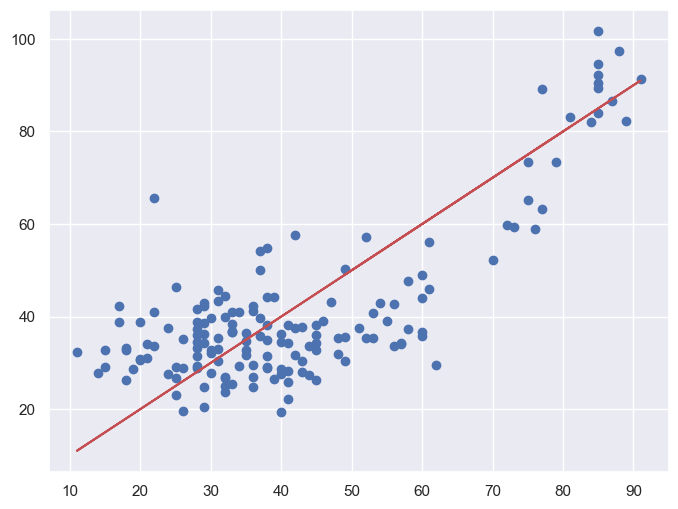

In [93]:
plt.scatter(y_test, model3_pred)
plt.plot(y_test, y_test, "r")

In [94]:
model3.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 148.7477 - mae: 10.0847


[148.74774169921875, 10.08465576171875]

#### 8.4 Forth model


In [95]:
model4 = Sequential()

In [96]:
#input layer
model4.add(Dense(150, input_shape = (9,), activation = 'relu'))

In [97]:
#hidden layers
model4.add(Dense(100, activation = "linear"))
model4.add(Dense(95, activation = "linear"))
model4.add(Dense(90, activation = "linear"))
model4.add(Dense(85, activation = "linear"))
model4.add(Dense(80, activation = "linear"))
model4.add(Dense(75, activation = "linear"))
model4.add(Dense(70, activation = "linear"))
model4.add(Dense(65, activation = "linear"))
model4.add(Dense(60, activation = "linear"))
model4.add(Dense(55, activation = "linear"))
model4.add(Dense(50, activation = "linear"))
model4.add(Dense(45, activation = "linear"))
model4.add(Dense(40, activation = "linear"))
model4.add(Dense(35, activation = "linear"))
model4.add(Dense(30, activation = "linear"))
model4.add(Dense(25, activation = "linear"))
model4.add(Dense(20, activation = "linear"))
model4.add(Dense(15, activation = "linear"))
model4.add(Dense(10, activation = "linear"))
model4.add(Dense(5, activation = "linear"))

In [98]:
#output layer
model4.add(Dense(1))

In [99]:
model4.compile(optimizer = "Adam", loss = "mse", metrics = "mae")

In [100]:
#training
model4.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 200, epochs = 80)

Epoch 1/80
4/4 [==============================] - 2s 185ms/step - loss: 2194.8979 - mae: 42.7855 - val_loss: 709.6823 - val_mae: 23.0396
Epoch 2/80
4/4 [==============================] - 0s 33ms/step - loss: 895.0673 - mae: 23.2055 - val_loss: 214.9233 - val_mae: 11.2234
Epoch 3/80
4/4 [==============================] - 0s 43ms/step - loss: 418.0399 - mae: 16.9866 - val_loss: 600.3030 - val_mae: 21.7688
Epoch 4/80
4/4 [==============================] - 0s 34ms/step - loss: 581.2158 - mae: 21.3851 - val_loss: 163.6252 - val_mae: 10.1269
Epoch 5/80
4/4 [==============================] - 0s 43ms/step - loss: 271.5207 - mae: 12.5908 - val_loss: 233.9953 - val_mae: 12.4399
Epoch 6/80
4/4 [==============================] - 0s 50ms/step - loss: 192.1841 - mae: 11.0465 - val_loss: 254.7000 - val_mae: 12.9674
Epoch 7/80
4/4 [==============================] - 0s 53ms/step - loss: 284.6505 - mae: 13.9417 - val_loss: 128.5594 - val_mae: 9.3426
Epoch 8/80
4/4 [==============================] - 0s 4

In [102]:
#testing
model4_pred = model4.predict(x_test)

5/5 [==============================] - 0s 6ms/step


##### 8.4.1 Forth Model Evaluation


In [103]:
#mean absolute error
mae4 = mean_absolute_error(y_test, model4_pred)
mae4

6.583471832035473

In [104]:
#mean squared error
mse4 = mean_squared_error(y_test, model4_pred)
mse4

71.15271167341821

We can notice that at this stage, making the model deeper will not make a huge difference.

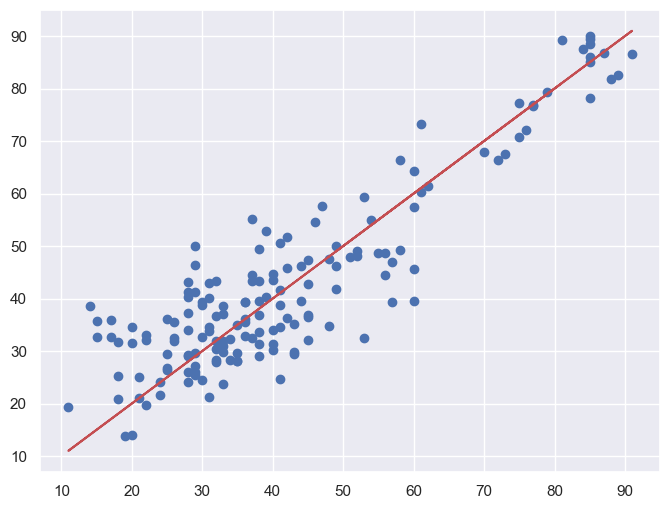

In [105]:
plt.scatter(y_test, model4_pred)
plt.plot(y_test, y_test, "r")

In [106]:
model4.evaluate(x_test, y_test)

5/5 [==============================] - 0s 7ms/step - loss: 71.1527 - mae: 6.5835


[71.1527099609375, 6.583471298217773]